In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re as re
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency, jarque_bera

from matplotlib.colors import ListedColormap

In [2]:
# reading files
commune=pd.read_excel(r"commune.xlsx")
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

In [3]:
commune.head()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10


Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

## Data Processing

Show the 5 first rows on the DF

In [4]:
quest.dtypes

Unnamed: 0             int64
gender                object
dob                   object
commune               object
created_at            object
modified_at           object
department            object
education_level       object
university            object
study_domain          object
current_employed      object
formal_sector_job     object
have_computer_home    object
internet_at_home      object
hear_AA_1             object
after_AA              object
quest_id              object
dtype: object

In [5]:
quest["created_at"] = quest["created_at"].str[:10]

In [6]:
quest.describe()

,Unnamed: 0
count,250.000000
mean,124.500000
std,72.312977
min,0.000000
25%,62.250000
50%,124.500000
75%,186.750000
max,249.000000


In [7]:
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          250 non-null    int64 
 1   gender              250 non-null    object
 2   dob                 244 non-null    object
 3   commune             250 non-null    object
 4   created_at          250 non-null    object
 5   modified_at         250 non-null    object
 6   department          249 non-null    object
 7   education_level     250 non-null    object
 8   university          250 non-null    object
 9   study_domain        250 non-null    object
 10  current_employed    250 non-null    object
 11  formal_sector_job   250 non-null    object
 12  have_computer_home  250 non-null    object
 13  internet_at_home    250 non-null    object
 14  hear_AA_1           250 non-null    object
 15  after_AA            250 non-null    object
 16  quest_id            250 no

In [8]:
#Format in Date 
quest["dob"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
quest["dob"] = pd.to_datetime(quest["dob"])

#Convert "created_at" in format date
quest["created_at"] = pd.to_datetime(quest["created_at"])



In [9]:
quest.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,1998-08-25,ht0111,2021-02-14,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,1996-09-29,ht0111,2021-02-16,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,male,1996-05-17,ht0111,2021-02-16,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601
3,3,male,1996-11-24,ht0111,2021-02-16,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601
4,4,male,1997-07-20,ht0111,2021-02-16,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601


In [10]:
#Create a Columns "age"
quest["age"] = ((quest["created_at"]-quest["dob"])//365)
#Choose the two first character in Age
quest["age"] = quest["age"].apply(lambda x: str(x)[:2])

In [11]:
def convAge(x):
    try:
        x = int(x)
        if x <=15:
            x = np.nan
    except ValueError:
        x = np.nan
    return x

quest["age"] = quest["age"].apply(lambda x: convAge(str(x)[:2]))

In [12]:
quest.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,age
0,0,male,1998-08-25,ht0111,2021-02-14,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,22.0
1,1,female,1996-09-29,ht0111,2021-02-16,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,24.0
2,2,male,1996-05-17,ht0111,2021-02-16,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,24.0
3,3,male,1996-11-24,ht0111,2021-02-16,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,24.0
4,4,male,1997-07-20,ht0111,2021-02-16,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,23.0


In [13]:
quest.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,age
0,0,male,1998-08-25,ht0111,2021-02-14,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,22.0
1,1,female,1996-09-29,ht0111,2021-02-16,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,24.0
2,2,male,1996-05-17,ht0111,2021-02-16,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,24.0
3,3,male,1996-11-24,ht0111,2021-02-16,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,24.0
4,4,male,1997-07-20,ht0111,2021-02-16,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,23.0


In [14]:
#Rename columns Created_at in Transaction
transaction.rename(columns={"created_at":"moncash_date"}, inplace=True)

#Rename columns Created_at in Ord
ord.rename(columns={"created_at":"credit_card_date"}, inplace=True)

#Rename columns Created_at in enroll
enroll.rename(columns={"created_at":"Enroll_Date"}, inplace=True)

#rename columns created-at in quest
quest.rename(columns={"created_at":"Application_Date"}, inplace=True)

In [15]:
# list  Study domains (use get_dummies)
study_domainok1 = pd.get_dummies(data=study_domain[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domainok2 = study_domainok1.groupby("quest_id").sum()

In [16]:
#list Technologies as columns based (use get_dummies)
technologyok1 = pd.get_dummies(technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologyok2 = technologyok1.groupby("quest_id").sum()

In [17]:
# list industry (use get_dummies)
industryok1= pd.get_dummies(industry[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
industryok2= industryok1.groupby("quest_id").sum()

In [18]:

# Format to date
transaction.moncash_date = pd.to_datetime(transaction.moncash_date).dt.tz_localize(None)
ord.credit_card_date= pd.to_datetime(ord.credit_card_date).dt.tz_localize(None)

In [19]:
# Merge Tables by "quest_id"
querry0=pd.merge(left=quest, right=enroll, how = 'left',on='quest_id')
querry1=pd.merge(left=querry0, right=study_domainok2, how = 'left',on='quest_id')
querry2=pd.merge(left=querry1, right=technologyok2, how = 'left',on='quest_id')
querry4=pd.merge(left=querry2, right=industryok2, how = 'left',on='quest_id')


In [20]:
querry4.shape

(250, 67)

In [21]:
querry4.columns

Index(['Unnamed: 0_x', 'gender', 'dob', 'commune', 'Application_Date',
       'modified_at', 'department', 'education_level', 'university',
       'study_domain', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'hear_AA_1', 'after_AA',
       'quest_id', 'age', 'Unnamed: 0_y', 'Enroll_Date', 'expiry_date',
       'user_id', 'course_name', 'course_id', 'percentage_completed',
       'completed_at', 'expired', 'is_free_trial', 'completed', 'started_at',
       'activated_at', 'updated_at', 'Accounting', 'Computer Science',
       'Economics', 'Electrical Engineering', 'Law', 'Management', 'Medicine',
       'Statistics', 'other_x', 'Bash', 'Excel', 'Git', 'Java', 'JavaScript',
       'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA', 'other_y',
       'Communications', 'Consulting', 'Education', 'Energy', 'Finance',
       'Healthcare', 'Insurance', 'Manufacturing', 'Marketing',
       'Public Sector/ Non-Profit Agencies', 'Retail/ E-Comme

In [22]:
#Merge "transaction" by "user_id"
querry5 = pd.merge(left=querry4, right=transaction, how = 'left',on='user_id')
#Merge "Ord" by "quest_id"
querry6 = pd.merge(left=querry5, right=ord, how = 'left',on='quest_id')

In [23]:
#rename columns in result6 file
querry6.rename(columns={"hear_AA_1":"communication_channel",'after_AA':"Bootcamp_Interest",'other_x':"Others_Study_Domain",'other_y':"Others_Technologies",'other':"other_industry",'Commune_FR':"commune_name"}, inplace=True)

In [24]:
querry6.head()

,Unnamed: 0_x,gender,dob,commune,Application_Date,modified_at_x,department,education_level,university,study_domain,...,user_id_y,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status
0,0,male,1998-08-25,ht0111,2021-02-14,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,1996-09-29,ht0111,2021-02-16,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,male,1996-05-17,ht0111,2021-02-16,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,male,1996-11-24,ht0111,2021-02-16,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,male,1997-07-20,ht0111,2021-02-16,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# create columns named "is_enroll"and  "payed"
querry6["is_enroll"] = 'No'
querry6.loc[~querry6.Enroll_Date.isna(),["is_enroll"]] ="Yes"

querry6["payed"] = 'No'
querry6.loc[~(querry6.credit_card_date.isna() & querry6.moncash_date.isna()),["payed"]] ="Yes"

In [26]:
querry6.rename(columns={"created_at": "application_date", "hear_AA_1":"channels","after_AA":"interest"}, inplace=True)

In [27]:
commune["Commune_Id"] = commune["Commune_Id"].str.lower()
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)

In [28]:
# Merge Result3 and Commune
querry7=pd.merge(left=querry6, right=commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')

In [29]:
querry7.head()

,Unnamed: 0_x,gender,dob,commune,Application_Date,modified_at_x,department,education_level,university,study_domain,...,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,is_enroll,payed,Commune_FR,Departement
0,0,male,1998-08-25,ht0111,2021-02-14,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Port-au-Prince,West
1,1,female,1996-09-29,ht0111,2021-02-16,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],...,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Port-au-Prince,West
2,2,male,1996-05-17,ht0111,2021-02-16,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Port-au-Prince,West
3,3,male,1996-11-24,ht0111,2021-02-16,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Port-au-Prince,West
4,4,male,1997-07-20,ht0111,2021-02-16,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],...,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Port-au-Prince,West


In [30]:
#rename the columns
querry7.rename(columns={'hear_AA_1':"Communication_Channel","after_AA":"Bootcamp_Interest","other_x":"Other_Study_Domain","created_at":"Inscription_Date"}, inplace=True)

In [31]:
querry7.columns

Index(['Unnamed: 0_x', 'gender', 'dob', 'commune', 'Application_Date',
       'modified_at_x', 'department', 'education_level', 'university',
       'study_domain', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'communication_channel',
       'Bootcamp_Interest', 'quest_id', 'age', 'Unnamed: 0_y', 'Enroll_Date',
       'expiry_date', 'user_id_x', 'course_name', 'course_id_x',
       'percentage_completed', 'completed_at', 'expired', 'is_free_trial',
       'completed', 'started_at', 'activated_at', 'updated_at', 'Accounting',
       'Computer Science', 'Economics', 'Electrical Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'Others_Study_Domain', 'Bash',
       'Excel', 'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau',
       'Python', 'R', 'SQL', 'VBA', 'Others_Technologies', 'Communications',
       'Consulting', 'Education', 'Energy', 'Finance', 'Healthcare',
       'Insurance', 'Manufacturing', 'Marketing',
   

In [32]:
#Drop Columns
querry7.drop([ 'user_id_y',
       'product_name', 'product_id', 'amount_dollars', 'amount_cents',
       'subscription', 'coupon_code', 'coupon_id', 'affiliate_referral_code',], axis="columns" , inplace=True)

In [33]:
#Drop Columns
querry7.drop([ 'Technology (Software/ Internet)',
       'Transportation', 'other_industry', 'moncash_date', 'modified_at_y',
       'course_id_y', 'transaction_id', 'credit_card_date', 'status',], axis="columns" , inplace=True)

In [34]:
querry7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0_x                        250 non-null    int64         
 1   gender                              250 non-null    object        
 2   dob                                 244 non-null    datetime64[ns]
 3   commune                             250 non-null    object        
 4   Application_Date                    250 non-null    datetime64[ns]
 5   modified_at_x                       250 non-null    object        
 6   department                          249 non-null    object        
 7   education_level                     250 non-null    object        
 8   university                          250 non-null    object        
 9   study_domain                        250 non-null    object        
 10  current_employed          

In [35]:
querry7.columns

Index(['Unnamed: 0_x', 'gender', 'dob', 'commune', 'Application_Date',
       'modified_at_x', 'department', 'education_level', 'university',
       'study_domain', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'communication_channel',
       'Bootcamp_Interest', 'quest_id', 'age', 'Unnamed: 0_y', 'Enroll_Date',
       'expiry_date', 'user_id_x', 'course_name', 'course_id_x',
       'percentage_completed', 'completed_at', 'expired', 'is_free_trial',
       'completed', 'started_at', 'activated_at', 'updated_at', 'Accounting',
       'Computer Science', 'Economics', 'Electrical Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'Others_Study_Domain', 'Bash',
       'Excel', 'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau',
       'Python', 'R', 'SQL', 'VBA', 'Others_Technologies', 'Communications',
       'Consulting', 'Education', 'Energy', 'Finance', 'Healthcare',
       'Insurance', 'Manufacturing', 'Marketing',
   

In [36]:
querry7.drop([ 'Unnamed: 0_x','dob', 'commune','modified_at_x','study_domain','current_employed','Unnamed: 0_y','expiry_date', 'user_id_x', 'course_name', 'course_id_x','percentage_completed', 'completed_at', 'expired', 'is_free_trial',
       'completed', 'started_at', 'activated_at', 'updated_at','Bash', 'VBA', 'Communications',
       'Consulting', 'Education', 'Energy', 'Finance', 'Healthcare',
       'Insurance', 'Manufacturing', 'Marketing',
       'Public Sector/ Non-Profit Agencies', 'Retail/ E-Commerce',
       'Unnamed: 0_x', 'Unnamed: 0_y',], axis="columns" , inplace=True)

In [37]:
querry7.columns

Index(['gender', 'Application_Date', 'department', 'education_level',
       'university', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'communication_channel', 'Bootcamp_Interest',
       'quest_id', 'age', 'Enroll_Date', 'Accounting', 'Computer Science',
       'Economics', 'Electrical Engineering', 'Law', 'Management', 'Medicine',
       'Statistics', 'Others_Study_Domain', 'Excel', 'Git', 'Java',
       'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL',
       'Others_Technologies', 'is_enroll', 'payed', 'Commune_FR',
       'Departement'],
      dtype='object')

###  1. How many observations and variables are there in the dataset
 

In [38]:
# here your codes
x=querry7.shape
print("the dataset have "+str(x[0])+" observations and "+str(x[1])+" variables")

the dataset have 250 observations and 36 variables


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [39]:
#2A
B=querry7["age"].mean()
print(f" The average age on the role dataset is {B} years. ")

# Average age of the observation on the whole male dataset
male=querry7[querry7["gender"]=="male"]
male_mean=male.age.mean()
print(f" The average age on the male dataset is {male_mean} years. ")

# Average age of the observation on the whole female dataset
female=querry7[querry7["gender"]=="female"]
female_mean=female.age.mean()
print(f" The average age on the female dataset is {female_mean} years. ")

 The average age on the role dataset is 27.282700421940927 years. 
 The average age on the male dataset is 27.515463917525775 years. 
 The average age on the female dataset is 26.232558139534884 years. 


In [40]:
#2B
#variance of the whole dataset,male and female
var=querry7['age'].var()
print(f'The variance of the whole dataset is: {var}. ')

# variance of the whole male dataset
var1=male['age'].var()
print(f'The variance of the whole male dataset is: {var1}. ')

# variance of the whole female dataset
var2=female['age'].var()
print(f'The variance of the whole feamale dataset is: {var2}. ')


The variance of the whole dataset is: 31.305335049703213. 
The variance of the whole male dataset is: 31.494578281074737. 
The variance of the whole feamale dataset is: 29.80177187153931. 


In [41]:
querry7["age"].replace({np.nan: B}, inplace=True)

In [42]:
fin_querry = querry7[["age", "gender"]]

In [43]:
#kurtosis of the whole dataset(male, female)
print("The kurtosis for the whole dataset is "+str(round(querry7["age"].kurtosis(),1)))
kurt_male = fin_querry[fin_querry["gender"]=='male'].kurtosis()
kurt_female = fin_querry[fin_querry["gender"]=='female'].kurtosis()
print("The kurtosis for male is: {}".format(round(kurt_male,1)))
print("The female's kurtosis is :"+str(round(kurt_female,1)))

The kurtosis for the whole dataset is 2.6
The kurtosis for male is: age    2.5
dtype: float64
The female's kurtosis is :age    4.3
dtype: float64


In [44]:
#skewness of the whole dataset, male and female
print("The Skewness for the whole dataset is "+str(round(querry7["age"].skew(),1)))
skew_male = fin_querry[fin_querry["gender"]=='male'].skew()
skew_female = fin_querry[fin_querry["gender"]=='female'].skew()
print("The Skewness  male is {}".format(round(skew_male,1)))
print("The Skewness female is "+str(round(skew_female,1)))

The Skewness for the whole dataset is 1.5
The Skewness  male is age    1.4
dtype: float64
The Skewness female is age    1.9
dtype: float64


In [45]:
rng = np.random.default_rng()
x = querry7.age
shapiro_test = shapiro(x)
shapiro_test
#perform Jarque-Bera test
resultat = jarque_bera(x)
if resultat[1]>0:
  print(f"Since this p-value = {resultat[1]} is not less than .05, we fail to reject the null hypothesis.")
else: 
  print(f"Since this p-value = {resultat[1]}, is less than .05, we reject the null hypothesis. Thus, \nwe have sufficient evidence to say that this data has skewness and kurtosis that is \nsignificantly different from a normal distribution.")

Since this p-value = 0.0, is less than .05, we reject the null hypothesis. Thus, 
we have sufficient evidence to say that this data has skewness and kurtosis that is 
significantly different from a normal distribution.


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

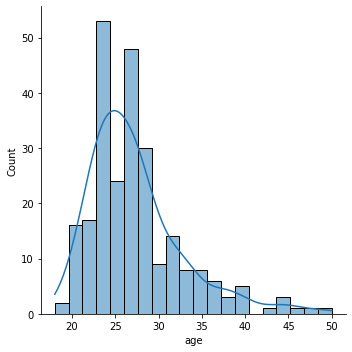

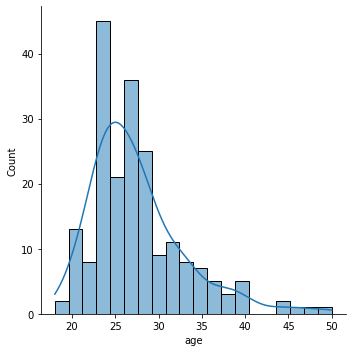

In [46]:
#Display
bins = 20
sns.displot(fin_querry['age'],bins = bins,kde = True)

sns.displot(fin_querry[fin_querry['gender']== 'male'].age, bins = bins,kde = True)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [47]:
stat, p = stats.ttest_1samp(fin_querry.age.dropna(), popmean=24)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
	print('ho mu=24 (fail to reject H0)')
else:
	print('h1 mu!= 24 (reject H0)')

Statistics=9.53, p=0.00
h1 mu!= 24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

In [48]:
#communication_channel
com_chanel_mean_age = pd.pivot_table(data=querry7, index= "communication_channel", values='age', aggfunc='mean')
com_chanel_mean_age.age.round(1)

communication_channel
Ayiti Analytics Website    27.0
Bootcamp Alumni            26.3
ESIH                       25.1
Facebook                   27.5
Friend                     27.0
Instagram                  24.6
LinkedIn                   30.0
WhatsApp                   27.8
other                      28.4
unknown                    22.0
Name: age, dtype: float64

### 6. Display an age boxplot for each communication channel

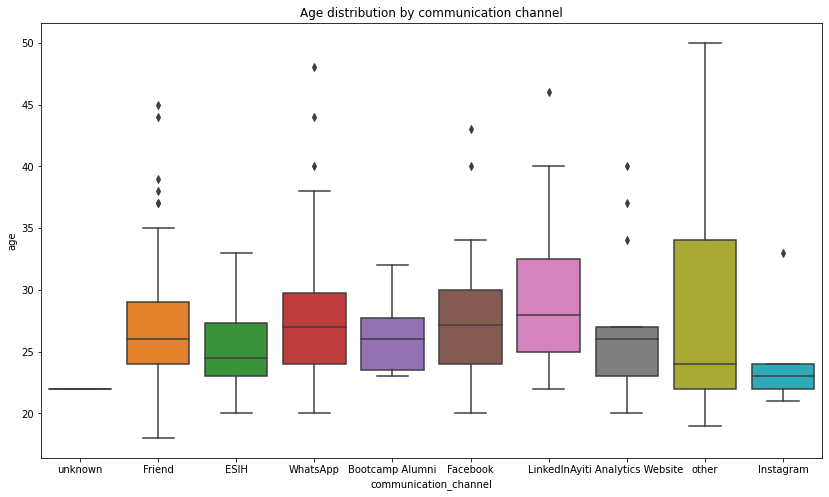

In [49]:
plt.figure(figsize=(14,8))
sns.boxplot( x=querry7["communication_channel"], y=querry7["age"]);
plt.title("Age distribution by communication channel")
plt.show()

### 7 .Is there a significant age difference between these groups

In [50]:

#here your codes
oklist = list(querry7["communication_channel"].unique())

quer = [querry7[querry7["communication_channel"] == i].age.dropna() for i in oklist]


stat, r = stats.f_oneway(quer[0], quer[1], quer[2], quer[3], quer[4], quer[5], quer[6], quer[7], quer[8], quer[9])
print(r)
if r < 0.05:
 print("Null Hypothesis Rejected")
else:
 print("0 Hypothesis Failed to be Rejected")

0.3162470467664811
0 Hypothesis Failed to be Rejected


### 8.Plan a BA strategy for each communication channel regarding the age group

In [51]:
BA=querry7.groupby(by=["communication_channel"]).age.mean().round(1).to_frame()
BA

,age
communication_channel,
Ayiti Analytics Website,27.0
Bootcamp Alumni,26.3
ESIH,25.1
Facebook,27.5
Friend,27.0
Instagram,24.6
LinkedIn,30.0
WhatsApp,27.8
other,28.4


In [52]:
# BA plan

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [53]:
print("\n*** The probability of being in each channel of communication knowing your are a woman ***")
prob_querry = querry7[querry7["gender"]=="female"]["communication_channel"]
prob_querry.value_counts(normalize=1).round(2)


*** The probability of being in each channel of communication knowing your are a woman ***


Friend                     0.23
WhatsApp                   0.19
Bootcamp Alumni            0.17
Facebook                   0.13
ESIH                       0.11
Ayiti Analytics Website    0.09
other                      0.04
LinkedIn                   0.02
Instagram                  0.02
Name: communication_channel, dtype: float64

### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [54]:
print("\n *** The probability of being in each channel of communication knowing your are a man ***")
prob_querry = querry7[querry7["gender"]=="male"]["communication_channel"]
prob_querry.value_counts(normalize=1).round(2)


 *** The probability of being in each channel of communication knowing your are a man ***


WhatsApp                   0.28
Friend                     0.28
Facebook                   0.17
LinkedIn                   0.07
ESIH                       0.06
Ayiti Analytics Website    0.05
other                      0.03
Bootcamp Alumni            0.03
Instagram                  0.02
unknown                    0.00
Name: communication_channel, dtype: float64

### 11. Deduce the probability of being a woman knowing each communication channel

In [55]:
probab = []
for _ in oklist:
    if _ != "unknown":
        ab = querry7[querry7["communication_channel"]== _]["gender"]
        a = ab.value_counts(normalize = 1)
        b = a.to_frame(name = "Hear_AA")
        c = b.loc["female", "Hear_AA"]
        probab.append(c)
        print("The probability of being a woman knowing the Communication Channels {} is : {}".format(_, c))

The probability of being a woman knowing the Communication Channels Friend is : 0.16417910447761194
The probability of being a woman knowing the Communication Channels ESIH is : 0.2777777777777778
The probability of being a woman knowing the Communication Channels WhatsApp is : 0.13636363636363635
The probability of being a woman knowing the Communication Channels Bootcamp Alumni is : 0.5714285714285714
The probability of being a woman knowing the Communication Channels Facebook is : 0.15
The probability of being a woman knowing the Communication Channels LinkedIn is : 0.06666666666666667
The probability of being a woman knowing the Communication Channels Ayiti Analytics Website is : 0.26666666666666666
The probability of being a woman knowing the Communication Channels other is : 0.2222222222222222
The probability of being a woman knowing the Communication Channels Instagram is : 0.2


### 13. Deduce the probability of being a woman knowing each communication channel

In [65]:
probab = []
for _ in oklist:
    if _ != "unknown":
        ab = querry7[querry7["communication_channel"]== _]["gender"]
        a = ab.value_counts(normalize = 1)
        b = a.to_frame(name = "Hear_AA")
        c = b.loc["female", "Hear_AA"].round(4)
        probab.append(c)
        print("The probability of being a woman knowing the Communication Channels {} is : {}\n".format(_, c))

The probability of being a woman knowing the Communication Channels Friend is : 0.1642

The probability of being a woman knowing the Communication Channels ESIH is : 0.2778

The probability of being a woman knowing the Communication Channels WhatsApp is : 0.1364

The probability of being a woman knowing the Communication Channels Bootcamp Alumni is : 0.5714

The probability of being a woman knowing the Communication Channels Facebook is : 0.15

The probability of being a woman knowing the Communication Channels LinkedIn is : 0.0667

The probability of being a woman knowing the Communication Channels Ayiti Analytics Website is : 0.2667

The probability of being a woman knowing the Communication Channels other is : 0.2222

The probability of being a woman knowing the Communication Channels Instagram is : 0.2



### 14. Deduce the probability of being a man knowing each communication channel

In [66]:
probab = []
for _ in oklist:
    if _ != "unknown":
        ab = querry7[querry7["communication_channel"]== _]["gender"]
        a = ab.value_counts(normalize = 1)
        b = a.to_frame(name = "Hear_AA")
        c = b.loc["male", "Hear_AA"].round(4)
        probab.append(c)
        print("** The probability of being a woman knowing the Communication Channels {} is: {}\n".format(_, c))

** The probability of being a woman knowing the Communication Channels Friend is: 0.8358

** The probability of being a woman knowing the Communication Channels ESIH is: 0.7222

** The probability of being a woman knowing the Communication Channels WhatsApp is: 0.8636

** The probability of being a woman knowing the Communication Channels Bootcamp Alumni is: 0.4286

** The probability of being a woman knowing the Communication Channels Facebook is: 0.85

** The probability of being a woman knowing the Communication Channels LinkedIn is: 0.9333

** The probability of being a woman knowing the Communication Channels Ayiti Analytics Website is: 0.7333

** The probability of being a woman knowing the Communication Channels other is: 0.7778

** The probability of being a woman knowing the Communication Channels Instagram is: 0.8



### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

In [67]:
#add a columns 
querry7["index"]=querry7.index

In [76]:
# pivot table: gender & communication channel
gender_com=pd.pivot_table(querry7,values="index", index=['gender',],
 columns=['communication_channel'], aggfunc="count",fill_value =0)

gender_com

communication_channel,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
gender,,,,,,,,,,
female,4,8,5,6,11,1,1,9,2,0
male,11,6,13,34,56,4,14,57,7,1


In [122]:
stat, p, dof, expected = chi2_contingency(gender_com.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected", "That is mean we have a dependency between gender and communication channel")
else:
 print("Hypothesis Accepted", "That is mean we do not have any dependency between gender and communication channel")

p-values: 0.02907484414773651
Hypothesis Rejected That is mean we have a dependency between gender and communication channel


### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

In [123]:
#pivot table: communication channel &  Bootcamp Interest
boot_com=pd.pivot_table(querry7,values="index", index=['Bootcamp_Interest',],
 columns=['communication_channel'], aggfunc="count",fill_value =0)

boot_com

communication_channel,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
Bootcamp_Interest,,,,,,,,,,
Finding a job/internship,1,3,2,10,10,2,2,11,2,0
Improving my data analysis skills,9,8,12,20,38,0,10,29,4,0
Mentorship,1,0,1,3,1,0,0,6,1,0
Switching careers,2,1,0,3,4,1,1,8,0,0
Training to start my own company,2,1,2,4,14,2,2,11,1,0
other,0,0,1,0,0,0,0,1,1,0
unknown,0,1,0,0,0,0,0,0,0,1


In [124]:
stat, p, dof, expected = chi2_contingency(boot_com.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected", "That is mean we have a dependency between bootcamp interest and communication channel")
else:
 print("Hypothesis Accepted", "That is mean we do not have any dependency between bootacmp interest and communication channel")

p-values: 2.7040922010696464e-14
Hypothesis Rejected That is mean we have a dependency between bootcamp interest and communication channel


### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [128]:
com_boot_gen=pd.pivot_table(data=querry7,values="quest_id",index="communication_channel",columns="gender",aggfunc="count")
print(com_boot_gen)

#Filt Bootcamp Interest by quest_id and gender
com_boot_gen=pd.pivot_table(data=querry7,values="quest_id",index="Bootcamp_Interest",columns="gender",aggfunc="count")
print(com_boot_gen)

gender                   female  male
communication_channel                
Ayiti Analytics Website     4.0  11.0
Bootcamp Alumni             8.0   6.0
ESIH                        5.0  13.0
Facebook                    6.0  34.0
Friend                     11.0  56.0
Instagram                   1.0   4.0
LinkedIn                    1.0  14.0
WhatsApp                    9.0  57.0
other                       2.0   7.0
unknown                     NaN   1.0
gender                             female   male
Bootcamp_Interest                               
Finding a job/internship             10.0   33.0
Improving my data analysis skills    24.0  106.0
Mentorship                            4.0    9.0
Switching careers                     3.0   17.0
Training to start my own company      6.0   33.0
other                                 NaN    3.0
unknown                               NaN    2.0


### 18.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender

In [60]:
# here your codes

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [99]:
Yes=len(querry7[querry7["payed"]=="Yes"])
No=len(querry7)-Yes

In [100]:

#here your code
querry_pay=pd.pivot_table(querry7[querry7['payed']=="Yes"], values="quest_id", index=['Bootcamp_Interest', 'communication_channel','gender'], aggfunc="count")
querry_pay=querry_pay/Yes
print("Probabilities for a payed applicant by Bootcamp interest , communication channel and gender category")
print(querry_pay)
#here your code
querry_pay1=pd.pivot_table(querry7[querry7['payed']=="No"], values="quest_id", index=['Bootcamp_Interest', 'communication_channel','gender'], aggfunc="count")
querry_pay1=querry_pay/No
print("Probabilities for a non-payed applicant by Bootcamp interest , communication channel and gender category")
print(querry_pay1)

Probabilities for a payed applicant by Bootcamp interest , communication channel and gender category
                                                                  quest_id
Bootcamp_Interest                 communication_channel   gender          
Finding a job/internship          Ayiti Analytics Website male    0.015385
                                  Bootcamp Alumni         female  0.015385
                                  ESIH                    male    0.015385
                                  Facebook                male    0.015385
                                  Friend                  female  0.015385
                                                          male    0.030769
                                  Instagram               male    0.015385
                                  LinkedIn                male    0.015385
                                  WhatsApp                female  0.015385
                                                          male    0.046154

### 20 deduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [125]:
deduce = querry7[(querry7["Bootcamp_Interest"]=="Improving my data analysis skills") & (querry7["communication_channel"] == "Friend") & (querry7["gender"]=="male")]

deduce1 = querry7["payed"].value_counts(normalize=1)

deduce1.rename(index={"Yes": "Probability that the applicant pays knowing he wants to improve her skills, he is a male, and he is invited by a Friend",
'No': "Probability that the applicant doesn't pay knowing he wants to improve her skills, he is a male, and he is invited by a Friend"}, inplace=True)
deduce1

Probability that the applicant doesn't pay knowing he wants to improve her skills, he is a male, and he is invited by a Friend    0.74
Probability that the applicant pays knowing he wants to improve her skills, he is a male, and he is invited by a Friend           0.26
Name: payed, dtype: float64

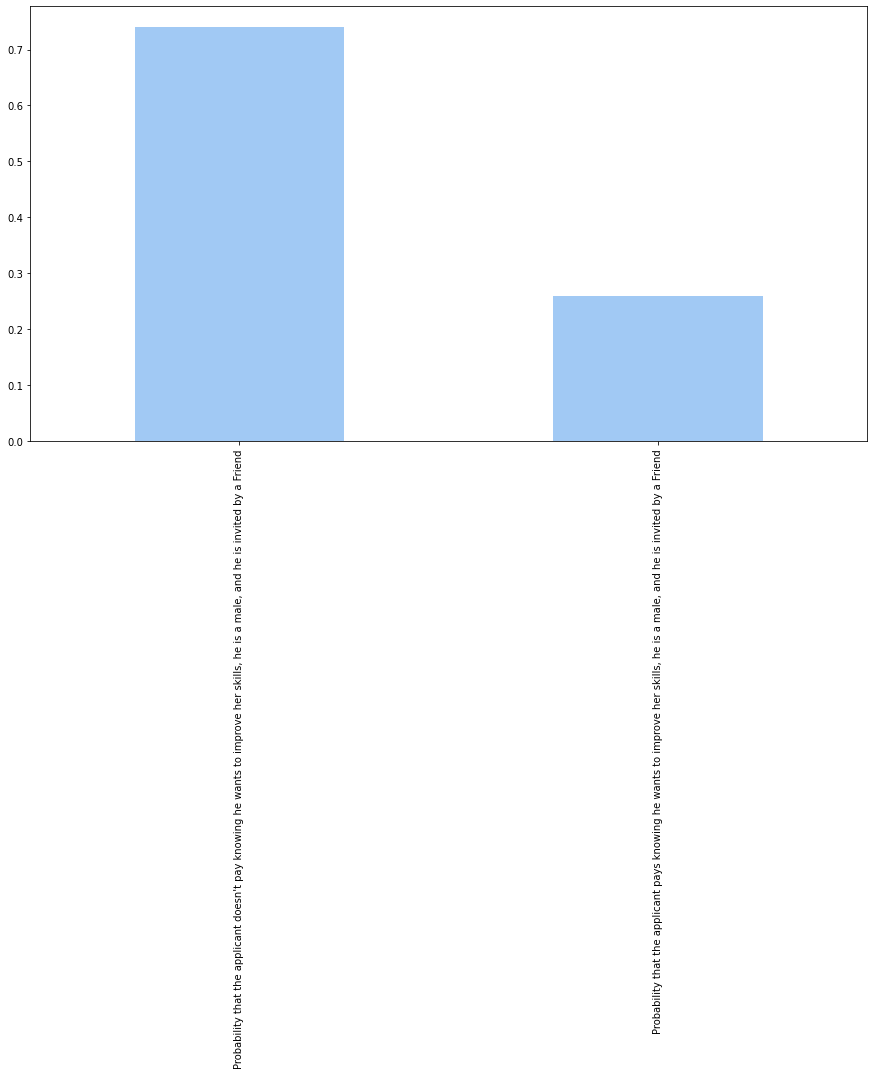

In [127]:
figure =deduce1.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 4)), 
          figsize=(15,8))

### Based on these findings, propose strategies to increase our sales?

In [61]:
#here your codes